## Objetivo
Este proyecto tiene como proposito desarrollar una aplicación que, al ingresar el nombre de un jugador de fútbol, pueda identificar a otros jugadores con habilidades y rendimiento similares. Para lograr esto, se utilizará un modelo de clasificación basado en el algoritmo de los k-vecinos más cercanos (k-NN).

#### Después de extraer los datos mediante web scraping, el siguiente paso es evaluar y preparar los datos para el modelado. Aquí están los pasos que debes seguir:

* Limpieza de datos: Este paso implica tratar con valores perdidos y eliminar cualquier ruido o inconsistencia en los datos.

* Análisis exploratorio de datos (EDA): Este paso nos ayudará a entender mejor los datos, visualizar los datos para identificar patrones, tendencias y relaciones entre las variables.

* Preprocesamiento de datos: En este paso, vamos a estandarizar los datos para que todas las características tengan la misma escala. Esto es especialmente importante para el algoritmo k-NN, ya que se basa en las distancias entre los puntos de datos.

* Selección de características: No todas las características pueden ser relevantes para cada posición, por ende se deben seleccionar las mas importantes para cada posición.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv(r"C:\Users\Carlo\Desktop\Todo el proyecto\Proyecto\DATA TOTAL\Data Completa.csv")

In [4]:
data.shape

(23584, 36)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23584 entries, 0 to 23583
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            23584 non-null  object 
 1   Goals                           23584 non-null  float64
 2   Big chances missed              23584 non-null  float64
 3   Successful dribbles %           23584 non-null  float64
 4   Total shots                     23584 non-null  float64
 5   Headed goals                    23584 non-null  float64
 6   Set piece conversion %          23584 non-null  float64
 7   Tackles                         23584 non-null  float64
 8   Interceptions                   23584 non-null  float64
 9   Penalty committed               23584 non-null  float64
 10  Clearances                      23584 non-null  float64
 11  Errors lead to goal             23584 non-null  float64
 12  Dribbled past                   

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,Goals,Big chances missed,Successful dribbles %,Total shots,Headed goals,Set piece conversion %,Tackles,Interceptions,Penalty committed,Clearances,...,Yellow cards,Red cards,Aerial duels won %,Total duels won %,Was fouled,Fouls,Appearances,Age Range,Position,Level
count,23584.000000,23584.000000,23584.000000,23584.00000,23584.000000,23584.000000,23584.000000,23584.000000,23584.000000,23584.000000,...,23584.000000,23584.000000,23584.000000,23584.000000,23584.000000,23584.000000,23584.000000,23584.000000,23584.000000,23584.000000
mean,0.064389,0.055199,43.746533,0.67271,0.011065,0.045851,0.896593,0.560246,0.010655,1.017328,...,0.125792,0.008399,44.211052,49.441537,0.655818,0.721851,17.319751,1.830351,2.760940,2.862916
std,0.112150,0.103618,29.907794,0.65181,0.034219,0.939980,0.708446,0.555008,0.043239,1.183649,...,0.137235,0.039819,25.487175,18.128512,0.542692,0.508873,10.952980,0.750475,0.880181,0.896544
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,23.530000,0.20000,0.000000,0.000000,0.330000,0.090000,0.000000,0.200000,...,0.000000,0.000000,30.000000,41.900000,0.250000,0.360000,8.000000,1.000000,2.000000,2.000000
50%,0.000000,0.000000,48.280000,0.50000,0.000000,0.000000,0.820000,0.410000,0.000000,0.590000,...,0.100000,0.000000,45.830000,50.000000,0.560000,0.690000,17.000000,2.000000,3.000000,3.000000
75%,0.090000,0.070000,61.900000,1.00000,0.000000,0.000000,1.320000,0.920000,0.000000,1.350000,...,0.190000,0.000000,59.090000,57.140000,0.960000,1.000000,27.000000,2.000000,3.000000,3.000000
max,1.500000,2.000000,100.000000,7.00000,1.000000,100.000000,10.000000,7.000000,1.000000,12.000000,...,2.000000,1.000000,100.000000,100.000000,5.000000,7.000000,46.000000,3.000000,4.000000,4.000000


In [8]:
data.isnull().sum().value_counts()

0    36
dtype: int64

#### Primeras conclusiones: 

* No existen valores faltantes.
* No existen duplicados.
* Contamos con 36 variables de las cuales solo dos no son numericas.


In [9]:
# Crea una copia del DataFrame excluyendo las columnas 'Name' y 'League'
data_sin_nombre_liga = data.drop(['Name', 'League'], axis=1)

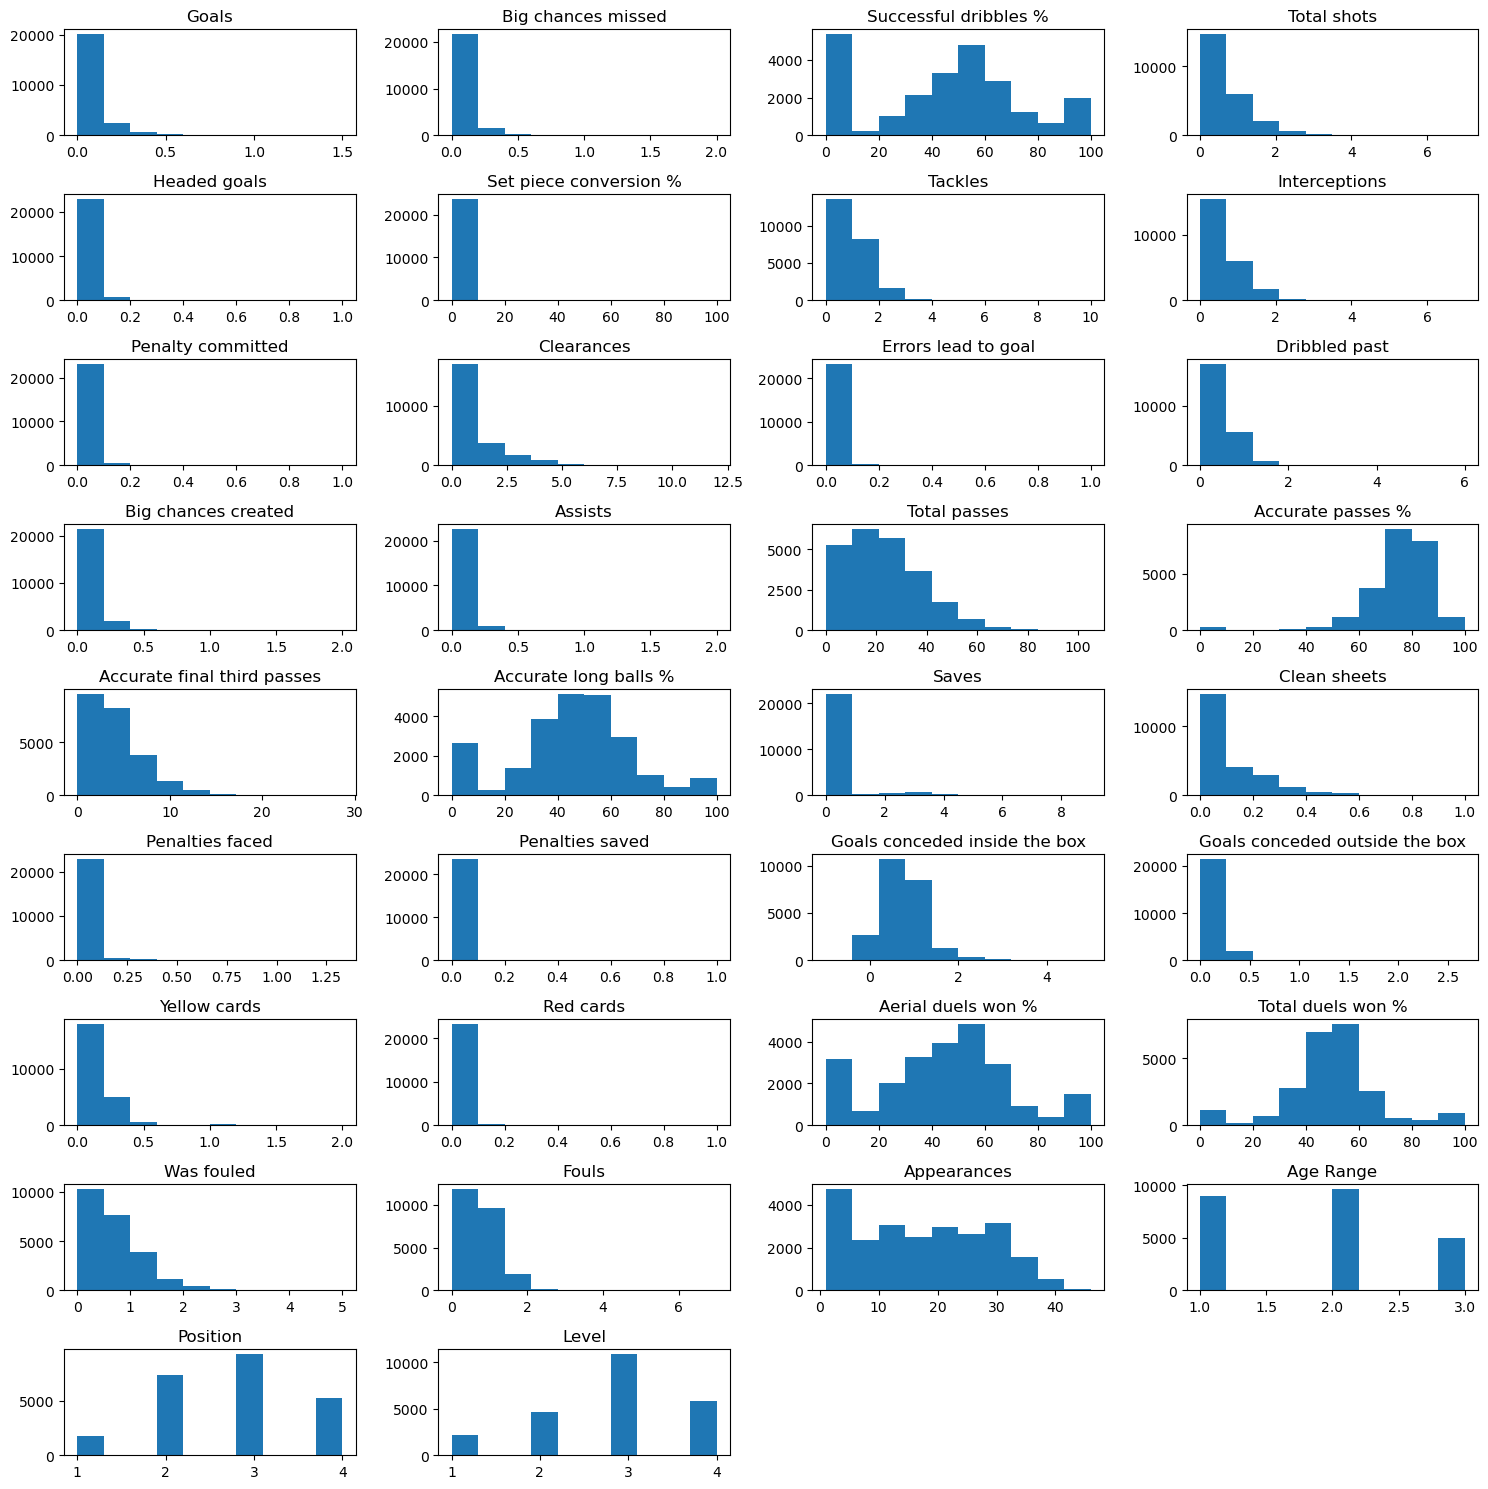

In [10]:
import numpy as np

columnas = data_sin_nombre_liga.columns
n = 4  # Número de gráficos por fila
fig, axs = plt.subplots((len(columnas) + n - 1) // n, n, figsize=(15, 15))

for i, columna in enumerate(columnas):
    ax = axs[i // n, i % n]
    ax.hist(data_sin_nombre_liga[columna])
    ax.set_title(columna)

# Elimina los ejes vacíos
for i in range(len(columnas), n * ((len(columnas) + n - 1) // n)):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()


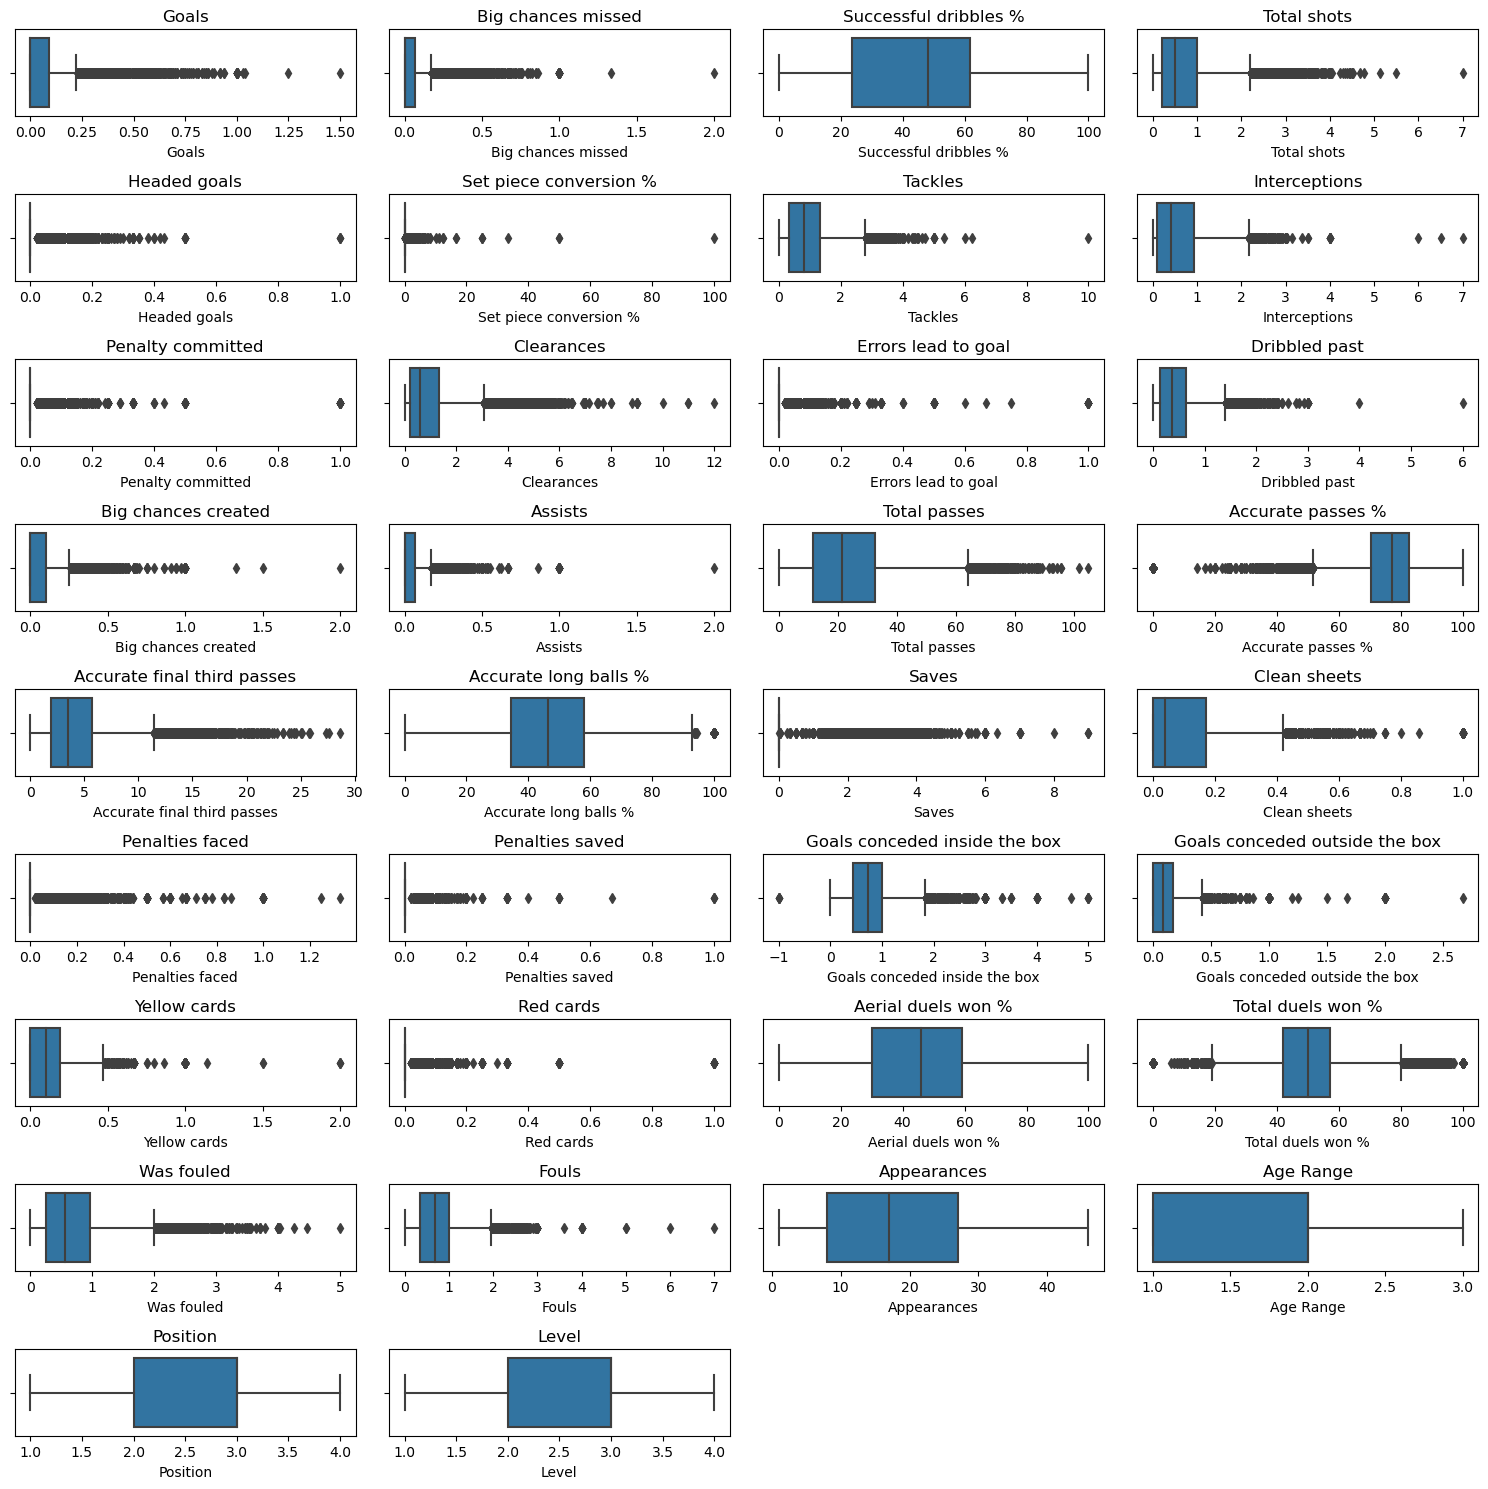

In [11]:
import numpy as np
import seaborn as sns

columnas = data_sin_nombre_liga.columns
n = 4  # Número de gráficos por fila
fig, axs = plt.subplots((len(columnas) + n - 1) // n, n, figsize=(15, 15))

for i, columna in enumerate(columnas):
    ax = axs[i // n, i % n]
    sns.boxplot(x=data_sin_nombre_liga[columna], ax=ax)
    ax.set_title(columna)

# Elimina los ejes vacíos
for i in range(len(columnas), n * ((len(columnas) + n - 1) // n)):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()


# Observaciones

Nuestro análisis reveló varias características importantes de los datos:

- Muchas variables exhiben una distribución sesgada. Para optimizar la precisión del modelo, se aconseja la estandarización de estos valores.
- El rango de edad demuestra una concentración predominante en las dos primeras categorías, correspondientes a los jugadores más jóvenes y de mediana edad. Los jugadores de mayor edad están menos representados.
- Las posiciones de delantero y mediocampista son las más frecuentes, seguidas por los defensas. Los porteros son menos comunes, lo cual es coherente con la estructura típica de un equipo de fútbol.

# Consideraciones
Extracción de Datos: Durante la extracción de datos, se puntuaron numerosas variables en función de los partidos jugados. Este enfoque se adoptó para garantizar la transparencia, dado que el conjunto de datos abarca ligas con diferentes números de partidos. Este factor es crucial al interpretar las habilidades que se presentan “Por Partido”.

Método PCA: Se contempló la aplicación del método de Análisis de Componentes Principales (PCA) para el análisis de datos. Sin embargo, dado que nuestro objetivo requiere una interpretación sencilla de las variables, el PCA, que transforma las variables en componentes principales menos interpretables, no se consideró adecuado para este análisis.

Filtrado de Jugadores: Se puede observar que la mayoría de la información respecto a las apariciones está cercana a 10 o mayor. Por ello, procederemos a filtrar y eliminar a los jugadores que tienen menos de 10 apariciones. De esta manera, podemos centrarnos en jugadores con un mínimo de apariciones y que tengan información respecto a sus habilidades. Entendemos que así evitamos tener información que podría distorsionar el resto de los datos.



In [12]:
data = pd.read_csv(r"C:\Users\Carlo\Desktop\Todo el proyecto\Proyecto\DATA TOTAL\Data Completa.csv")
data_filtrado = data[data["Appearances"] > 10]

In [ ]:
carpeta_destino = r"C:\Users\Carlo\Desktop\Todo el proyecto\Proyecto\DATA TOTAL"
nombre_archivo = "filtrada_apariciones.csv"

# Combina la carpeta y el nombre del archivo para obtener la ruta completa
ruta_completa = os.path.join(carpeta_destino, nombre_archivo)

# Guarda el DataFrame en el archivo CSV con la ruta completa
data_filtrado.to_csv(ruta_completa, index=False)

## Procedimiento para el Análisis Segmentado de Datos por Posición
El análisis segmentado de datos por posición se realiza con el objetivo de examinar el impacto de cada variable en cada posición. Este procedimiento nos permite determinar cuáles son las variables más relevantes para cada posición, permitiéndonos centrar nuestros esfuerzos en los aspectos de mayor importancia. A continuación, se detalla el procedimiento:

* Segmentación de Datos: Los datos se segmentan en función de la posición de cada jugador. Esto nos permite analizar y comparar las características de los jugadores en función de su posición en el campo.

* Análisis de Impacto de Variables: Se realiza un análisis para determinar el impacto de cada variable en cada posición. Este análisis nos ayuda a entender cómo cada variable afecta el rendimiento de un jugador en una posición determinada.

* Identificación de Variables Clave: A partir del análisis de impacto, identificamos las variables más importantes para cada posición. Estas variables son aquellas que tienen un impacto significativo en el rendimiento de los jugadores en sus respectivas posiciones.

* Enfoque en Puntos Clave: Con las variables clave identificadas, podemos centrar nuestros esfuerzos y recursos en estos puntos clave, lo que nos permite optimizar el rendimiento de los jugadores en sus respectivas posiciones.

In [15]:
data = pd.read_csv(r"C:\Users\Carlo\Desktop\Todo el proyecto\Proyecto\DATA TOTAL\Data - Filtrada apariciones.csv")

In [17]:
data.head(1)

,Name,Goals,Big chances missed,Successful dribbles %,Total shots,Headed goals,Set piece conversion %,Tackles,Interceptions,Penalty committed,...,Red cards,Aerial duels won %,Total duels won %,Was fouled,Fouls,Appearances,Age Range,Position,League,Level
0,Ronie Carrillo,0.6,0.27,53.33,4.0,0.0,0.0,0.33,0.13,0.0,...,0.0,43.88,41.95,1.13,1.67,15,2,4,Ecuador Serie A,3


In [18]:
data["Position"].value_counts()

3    6498
2    5061
4    3419
1     926
Name: Position, dtype: int64

In [19]:
data.columns

Index(['Name', 'Goals', 'Big chances missed', 'Successful dribbles %',
       'Total shots', 'Headed goals', 'Set piece conversion %', 'Tackles',
       'Interceptions', 'Penalty committed', 'Clearances',
       'Errors lead to goal', 'Dribbled past', 'Big chances created',
       'Assists', 'Total passes', 'Accurate passes %',
       'Accurate final third passes', 'Accurate long balls %', 'Saves',
       'Clean sheets', 'Penalties faced', 'Penalties saved',
       'Goals conceded inside the box', 'Goals conceded outside the box',
       'Yellow cards', 'Red cards', 'Aerial duels won %', 'Total duels won %',
       'Was fouled', 'Fouls', 'Appearances', 'Age Range', 'Position', 'League',
       'Level'],
      dtype='object')

In [20]:
#Esta serán las columnas que utilizaremos para la agrupación.
cols=['Position',
#shots and goals
'Goals','Total shots', 'Headed goals', 'Set piece conversion %', 
#Pass and Assits
'Assists', 'Total passes', 'Accurate passes %','Accurate final third passes', 'Accurate long balls %',
#Creative Actions
'Successful dribbles %','Big chances created',
# 1vs1
'Aerial duels won %', 'Total duels won %','Was fouled',
#Defensive Actions
'Tackles', 'Interceptions','Clearances','Clean sheets','Saves','Penalties saved',

#Weak points
'Big chances missed', 'Penalty committed', 'Errors lead to goal', 'Dribbled past','Goals conceded inside the box', 'Goals conceded outside the box', 'Fouls','Yellow cards', 'Red cards',]

In [23]:
group_df=data[cols]
group_df.head()

,Position,Goals,Total shots,Headed goals,Set piece conversion %,Assists,Total passes,Accurate passes %,Accurate final third passes,Accurate long balls %,...,Penalties saved,Big chances missed,Penalty committed,Errors lead to goal,Dribbled past,Goals conceded inside the box,Goals conceded outside the box,Fouls,Yellow cards,Red cards
0,4,0.60,4.00,0.0,0.00,0.27,16.07,67.22,4.87,40.00,...,0.00,0.27,0.0,0.0,0.07,1.20,0.07,1.67,0.07,0.00
1,1,0.00,0.00,0.0,0.00,0.00,23.71,54.52,1.71,43.08,...,0.00,0.00,0.0,0.0,0.00,0.57,0.14,0.00,0.14,0.07
2,3,0.37,2.83,0.0,0.51,0.17,27.17,72.15,6.37,46.90,...,0.00,0.17,0.0,0.0,0.43,1.50,0.17,1.00,0.20,0.00
3,3,0.29,1.29,0.0,0.00,0.14,37.05,83.80,12.05,68.00,...,0.00,0.00,0.0,0.0,0.48,0.95,0.05,0.95,0.29,0.00
4,1,0.00,0.00,0.0,0.00,0.00,23.00,77.13,0.96,53.85,...,0.07,0.00,0.0,0.0,0.00,0.52,0.07,0.00,0.07,0.00


In [24]:
group_position=group_df.groupby('Position').agg('sum')
group_position.head()

,Goals,Total shots,Headed goals,Set piece conversion %,Assists,Total passes,Accurate passes %,Accurate final third passes,Accurate long balls %,Successful dribbles %,...,Penalties saved,Big chances missed,Penalty committed,Errors lead to goal,Dribbled past,Goals conceded inside the box,Goals conceded outside the box,Fouls,Yellow cards,Red cards
Position,,,,,,,,,,,,,,,,,,,,,
1,0.52,3.53,0.02,2.94,3.18,26086.91,59331.02,1139.79,36942.02,25804.05,...,24.43,0.13,12.94,29.72,31.86,1035.20,159.75,19.14,67.52,3.51
2,167.17,2311.63,65.99,100.97,183.88,186107.76,400064.98,23298.73,224959.13,286234.55,...,0.03,142.45,103.06,39.54,2446.46,4691.74,729.40,4304.93,837.85,58.10
3,511.92,5834.44,52.80,407.74,460.97,170913.91,512679.14,40746.34,343244.25,343473.39,...,0.05,355.34,43.01,17.53,4250.56,4879.69,754.39,5839.85,935.30,47.46
4,637.27,4788.95,104.11,137.20,251.61,46343.12,243323.46,14152.22,176478.39,154057.74,...,0.00,560.04,8.88,1.92,1184.87,2256.73,352.13,2856.75,354.05,19.50


### Obtener los datos donde cada valor representa la proporción que ese valor contribuye al total de su columna, redondeado a dos decimales.

In [26]:
group_position=group_position.apply(lambda x: np.round(x/x.sum(),2))
group_position

,Goals,Total shots,Headed goals,Set piece conversion %,Assists,Total passes,Accurate passes %,Accurate final third passes,Accurate long balls %,Successful dribbles %,...,Penalties saved,Big chances missed,Penalty committed,Errors lead to goal,Dribbled past,Goals conceded inside the box,Goals conceded outside the box,Fouls,Yellow cards,Red cards
Position,,,,,,,,,,,,,,,,,,,,,
1,0.00,0.00,0.00,0.00,0.00,0.06,0.05,0.01,0.05,0.03,...,1.0,0.00,0.08,0.34,0.00,0.08,0.08,0.00,0.03,0.03
2,0.13,0.18,0.30,0.16,0.20,0.43,0.33,0.29,0.29,0.35,...,0.0,0.13,0.61,0.45,0.31,0.36,0.37,0.33,0.38,0.45
3,0.39,0.45,0.24,0.63,0.51,0.40,0.42,0.51,0.44,0.42,...,0.0,0.34,0.26,0.20,0.54,0.38,0.38,0.45,0.43,0.37
4,0.48,0.37,0.47,0.21,0.28,0.11,0.20,0.18,0.23,0.19,...,0.0,0.53,0.05,0.02,0.15,0.18,0.18,0.22,0.16,0.15


In [27]:
group_position_T=group_position.T
group_position_T.columns=['Goalkeeper','Defense','Midfielders','Forwards']
group_position_T

,Goalkeeper,Defense,Midfielders,Forwards
Goals,0.00,0.13,0.39,0.48
Total shots,0.00,0.18,0.45,0.37
Headed goals,0.00,0.30,0.24,0.47
Set piece conversion %,0.00,0.16,0.63,0.21
Assists,0.00,0.20,0.51,0.28
Total passes,0.06,0.43,0.40,0.11
Accurate passes %,0.05,0.33,0.42,0.20
Accurate final third passes,0.01,0.29,0.51,0.18
Accurate long balls %,0.05,0.29,0.44,0.23
Successful dribbles %,0.03,0.35,0.42,0.19


<function matplotlib.pyplot.show(close=None, block=None)>

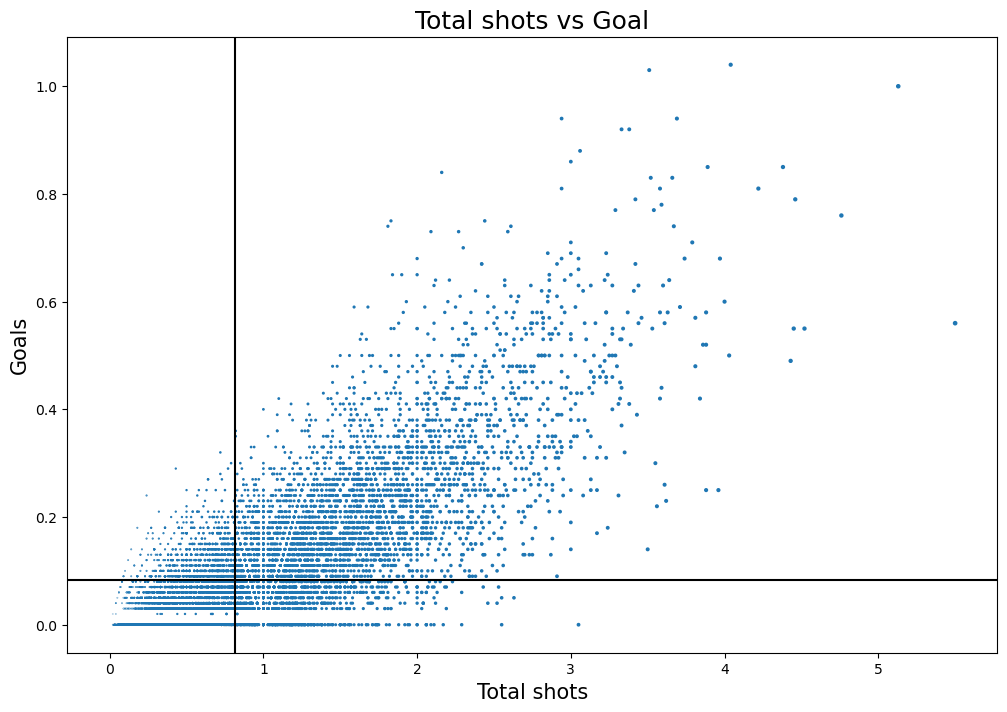

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(x=group_df['Total shots'], y=group_df['Goals'], s=group_df['Total shots'])
plt.title('Total shots vs Goal', fontsize=18)
plt.xlabel('Total shots',fontsize=15)
plt.ylabel('Goals',fontsize=15)
plt.axvline(group_df['Total shots'].mean(),0,160,c='k')
plt.axhline(group_df['Goals'].mean(),0,26,c='k')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

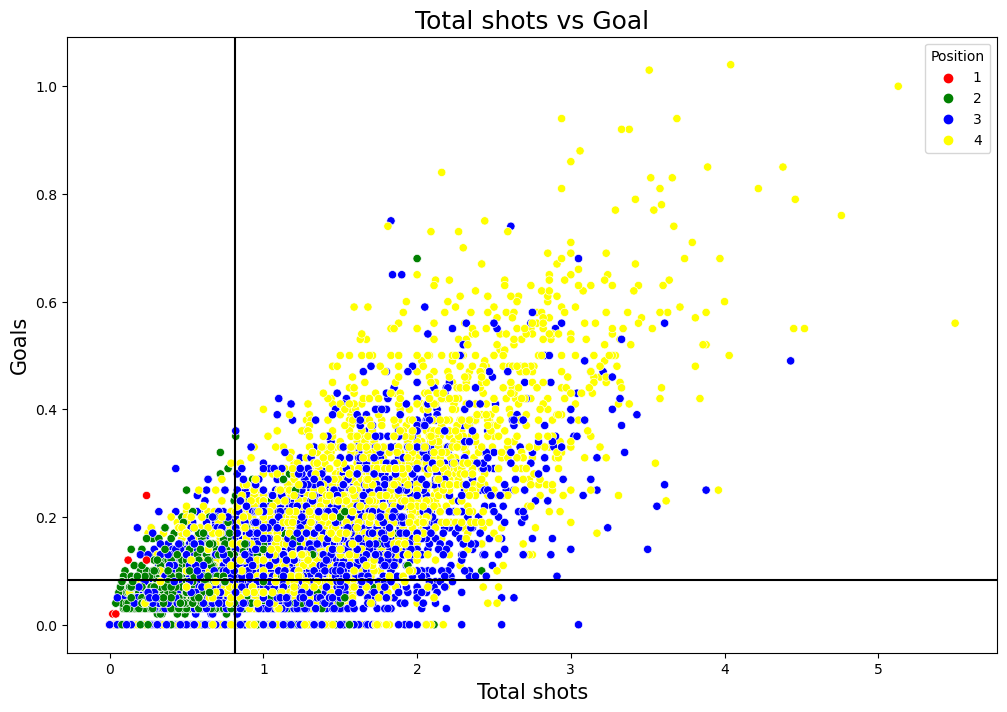

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=group_df['Total shots'], y=group_df['Goals'], hue=group_df['Position'], palette=['red', 'green', 'blue', 'yellow'])
plt.title('Total shots vs Goal', fontsize=18)
plt.xlabel('Total shots',fontsize=15)
plt.ylabel('Goals',fontsize=15)
plt.axvline(group_df['Total shots'].mean(),0,160,c='k')
plt.axhline(group_df['Goals'].mean(),0,26,c='k')
plt.show

In [33]:
# Filtra el dataframe usando la condición de PORTERO goleador
resultado = data.query("Position == 1 and Goals > 0.2")
# Muestra el resultado
resultado

,Name,Goals,Big chances missed,Successful dribbles %,Total shots,Headed goals,Set piece conversion %,Tackles,Interceptions,Penalty committed,...,Red cards,Aerial duels won %,Total duels won %,Was fouled,Fouls,Appearances,Age Range,Position,League,Level
6708,Tiago Volpi,0.24,0.0,0.0,0.24,0.0,0.0,0.0,0.0,0.0,...,0.0,71.43,70.0,0.12,0.0,17,3,1,Mexico Liga MX Apertura,3


In [34]:
# Filtra el dataframe usando la condición de DEFENSAS goleadores
resultado = data.query("Position == 2 and Goals > 0.4")
# Muestra el resultado
resultado

,Name,Goals,Big chances missed,Successful dribbles %,Total shots,Headed goals,Set piece conversion %,Tackles,Interceptions,Penalty committed,...,Red cards,Aerial duels won %,Total duels won %,Was fouled,Fouls,Appearances,Age Range,Position,League,Level
858,James Tavernier,0.42,0.13,48.33,2.16,0.05,1.01,2.00,0.87,0.00,...,0.0,62.35,52.13,0.37,0.89,38,3,2,Escocia Premiership,3
8363,Ladislav Krejčí,0.68,0.05,100.00,2.00,0.16,0.00,0.58,1.26,0.05,...,0.0,61.70,57.52,1.26,1.21,19,1,2,Republica Checa 1. Liga,3


In [35]:
# Filtra el dataframe usando la condición de MEDIOS goleadores
resultado = data.query("Position == 3 and Goals > 0.6")
# Muestra el resultado
resultado

,Name,Goals,Big chances missed,Successful dribbles %,Total shots,Headed goals,Set piece conversion %,Tackles,Interceptions,Penalty committed,...,Red cards,Aerial duels won %,Total duels won %,Was fouled,Fouls,Appearances,Age Range,Position,League,Level
338,Sebastián Driussi,0.68,0.30,50.00,3.05,0.08,0.0,0.86,0.30,0.00,...,0.00,42.11,45.34,1.62,1.16,37,2,3,EEUU MLS,4
351,Dániel Gazdag,0.65,0.30,27.85,1.84,0.00,0.0,1.11,0.30,0.03,...,0.00,25.00,39.75,1.51,1.22,37,2,3,EEUU MLS,4
1610,Neymar,0.65,0.45,45.24,1.90,0.05,0.0,1.10,0.20,0.00,...,0.05,33.33,51.85,3.25,1.25,20,3,3,Francia Liga 1,2
3059,Abdenasser El Khayati,0.75,0.00,54.29,1.83,0.00,0.0,0.33,0.00,0.00,...,0.00,50.00,50.00,0.50,0.25,12,3,3,Indian Super League,4
3446,Chuba Akpom,0.74,0.45,55.13,2.61,0.18,0.0,0.68,0.18,0.00,...,0.00,40.27,50.12,2.24,0.84,38,2,3,Inglaterra Championship,2


In [36]:
# Filtra el dataframe usando la condición de DELANTEROS goleadores
resultado = data.query("Position == 4 and Goals > 0.85")
# Muestra el resultado
resultado

,Name,Goals,Big chances missed,Successful dribbles %,Total shots,Headed goals,Set piece conversion %,Tackles,Interceptions,Penalty committed,...,Red cards,Aerial duels won %,Total duels won %,Was fouled,Fouls,Appearances,Age Range,Position,League,Level
3960,Erling Haaland,1.03,0.80,37.93,3.51,0.20,0.00,0.09,0.09,0.00,...,0.00,50.00,40.55,0.69,0.89,35,1,4,Inglaterra Premier League,1
6964,Akor Adams,1.00,0.67,38.71,5.13,0.27,0.00,0.33,0.07,0.00,...,0.07,46.55,39.22,1.07,1.20,15,1,4,Noruega Eliteserien,3
9722,Benie Traore,0.86,0.43,35.71,3.00,0.00,0.00,0.50,0.29,0.00,...,0.00,30.43,33.33,1.29,1.43,14,1,4,Suecia Allsvenskan,3
10223,Mauro Icardi,0.92,0.54,54.55,3.38,0.21,0.00,0.33,0.04,0.00,...,0.00,43.52,41.84,0.63,0.79,24,2,4,Turquia Trendyol Süper Lig,3
10234,Enner Valencia,0.94,0.48,44.92,2.94,0.10,0.00,0.81,0.32,0.00,...,0.03,41.90,45.61,2.13,1.42,31,3,4,Turquia Trendyol Süper Lig,3
11379,Gift Orban,0.94,0.44,50.00,3.69,0.00,2.08,0.38,0.06,0.00,...,0.00,18.92,29.51,0.56,0.63,16,1,4,Belgica ProLeague,3
13817,José Kanté,0.88,0.13,70.97,3.06,0.13,0.00,1.44,0.50,0.00,...,0.00,48.39,46.04,1.13,2.19,16,3,4,China CFA,4
13823,Marcão,1.04,0.35,45.28,4.04,0.42,0.00,0.38,0.19,0.04,...,0.00,64.12,49.67,1.23,1.35,26,2,4,China CFA,4
13832,Wu Lei,0.92,0.75,25.00,3.33,0.00,0.00,0.42,0.17,0.00,...,0.00,37.84,44.93,0.92,0.25,12,3,4,China CFA,4


In [37]:
group_position_T

,Goalkeeper,Defense,Midfielders,Forwards
Goals,0.00,0.13,0.39,0.48
Total shots,0.00,0.18,0.45,0.37
Headed goals,0.00,0.30,0.24,0.47
Set piece conversion %,0.00,0.16,0.63,0.21
Assists,0.00,0.20,0.51,0.28
Total passes,0.06,0.43,0.40,0.11
Accurate passes %,0.05,0.33,0.42,0.20
Accurate final third passes,0.01,0.29,0.51,0.18
Accurate long balls %,0.05,0.29,0.44,0.23
Successful dribbles %,0.03,0.35,0.42,0.19


### Procedemos a dividir el dataframe después de haberlo tratado, dividiremos por posición para poder hacer representaciones de cada una.

In [40]:
Df_1=pd.read_csv(r'C:\Users\Carlo\Desktop\Todo el proyecto\Proyecto\DATA TOTAL\Data - Filtrada apariciones.csv')

In [42]:
# Filtra el dataframe usando la condición
df_deff= Df_1.query("Position == 2")
# Muestra el resultado
df_deff.head(1)


,Name,Goals,Big chances missed,Successful dribbles %,Total shots,Headed goals,Set piece conversion %,Tackles,Interceptions,Penalty committed,...,Red cards,Aerial duels won %,Total duels won %,Was fouled,Fouls,Appearances,Age Range,Position,League,Level
15,José Quintero,0.22,0.04,57.89,0.91,0.04,0.0,1.22,0.83,0.0,...,0.09,84.0,63.08,0.96,1.0,23,3,2,Ecuador Serie A,3


In [43]:
# Filtra el dataframe usando la condición
df_medios= Df_1.query("Position == 3")
# Muestra el resultado
df_medios.head(1)

,Name,Goals,Big chances missed,Successful dribbles %,Total shots,Headed goals,Set piece conversion %,Tackles,Interceptions,Penalty committed,...,Red cards,Aerial duels won %,Total duels won %,Was fouled,Fouls,Appearances,Age Range,Position,League,Level
2,Joaquín Vergés,0.37,0.17,43.59,2.83,0.0,0.51,1.53,0.6,0.0,...,0.0,37.04,50.0,1.03,1.0,30,3,3,Ecuador Serie A,3


In [44]:
# Filtra el dataframe usando la condición
df_del= Df_1.query("Position == 4")
# Muestra el resultado
df_del.head(1)

,Name,Goals,Big chances missed,Successful dribbles %,Total shots,Headed goals,Set piece conversion %,Tackles,Interceptions,Penalty committed,...,Red cards,Aerial duels won %,Total duels won %,Was fouled,Fouls,Appearances,Age Range,Position,League,Level
0,Ronie Carrillo,0.6,0.27,53.33,4.0,0.0,0.0,0.33,0.13,0.0,...,0.0,43.88,41.95,1.13,1.67,15,2,4,Ecuador Serie A,3


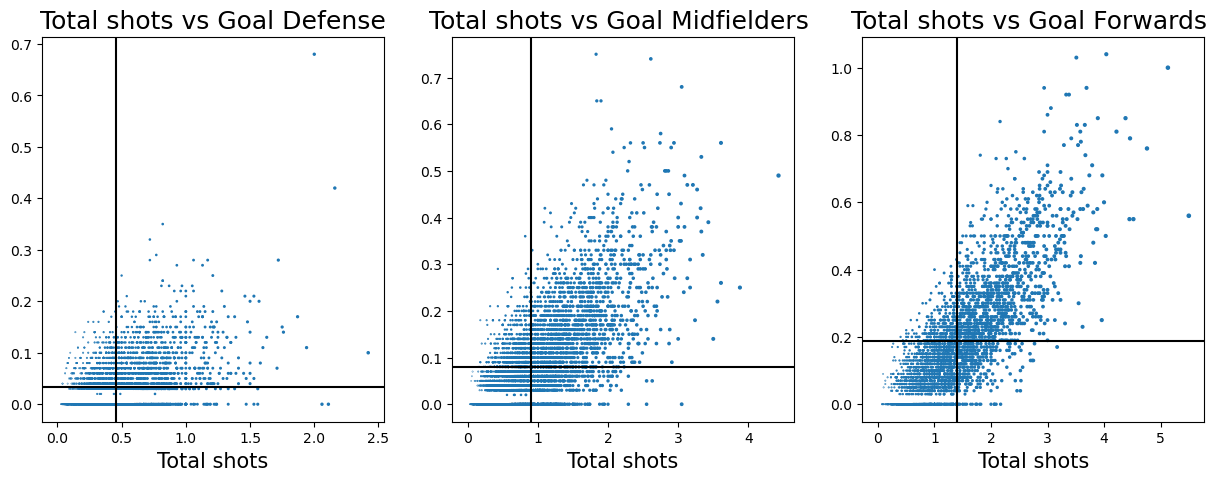

In [45]:
fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(15,5))


ax[0].scatter(x=df_deff['Total shots'], y=df_deff['Goals'], s=df_deff['Total shots'])
ax[0].set_title('Total shots vs Goal Defense', fontsize=18)
ax[0].set_xlabel('Total shots',fontsize=15)
ax[0].axvline(df_deff['Total shots'].mean(),0,160,c='k')
ax[0].axhline(df_deff['Goals'].mean(),0,26,c='k')

ax[1].scatter(x=df_medios['Total shots'], y=df_medios['Goals'], s=df_medios['Total shots'])
ax[1].set_title('Total shots vs Goal Midfielders ', fontsize=18)
ax[1].set_xlabel('Total shots',fontsize=15)
ax[1].axvline(df_medios['Total shots'].mean(),0,160,c='k')
ax[1].axhline(df_medios['Goals'].mean(),0,26,c='k')

ax[2].scatter(x=df_del['Total shots'], y=df_del['Goals'], s=df_del['Total shots'])
ax[2].set_title('Total shots vs Goal Forwards ', fontsize=18)
ax[2].set_xlabel('Total shots',fontsize=15)
ax[2].axvline(df_del['Total shots'].mean(),0,160,c='k')
ax[2].axhline(df_del['Goals'].mean(),0,26,c='k')

In [51]:
df_deff[['Total shots','Goals']].corr()

,Total shots,Goals
Total shots,1.000000,0.462337
Goals,0.462337,1.000000


In [52]:
df_medios[['Total shots','Goals']].corr()

,Total shots,Goals
Total shots,1.000000,0.699732
Goals,0.699732,1.000000


In [53]:
df_del[['Total shots','Goals']].corr()

,Total shots,Goals
Total shots,1.000000,0.780484
Goals,0.780484,1.000000


## Representación Gráfica de la Participación por Posición


Para visualizar la participación de cada posición en las acciones del campo, vamos a representarla en un gráfico de barras. Este gráfico permitirá una interpretación visual clara y directa de los datos. A continuación, se detalla el procedimiento:

* Ordenación de Datos: Las posiciones se ordenarán de mayor a menor en función de su participación en las acciones del campo. Esto nos permitirá identificar rápidamente qué posiciones tienen una mayor participación.

* Representación Gráfica: Cada posición se representará como una barra en el gráfico. La longitud de la barra corresponderá a la participación de esa posición en las acciones del campo.

* Línea de Corte: Añadiremos una línea al gráfico que cortará las barras en el punto donde una posición destaca sobre las demás, dominando dicha acción. Esta línea de corte nos permitirá identificar visualmente las posiciones que tienen un impacto significativo en las acciones del campo.

Este gráfico nos permitirá visualizar de manera efectiva la participación de cada posición en las acciones del campo, destacando las posiciones que dominan cada acción.

In [54]:
#Porteros
group_position_T.sort_values(by='Goalkeeper', ascending=False,inplace=True)
group_position_T.head()

,Goalkeeper,Defense,Midfielders,Forwards
Penalties saved,1.00,0.00,0.00,0.00
Saves,0.99,0.00,0.00,0.00
Errors lead to goal,0.34,0.45,0.20,0.02
Clean sheets,0.14,0.50,0.29,0.07
Aerial duels won %,0.11,0.36,0.36,0.17


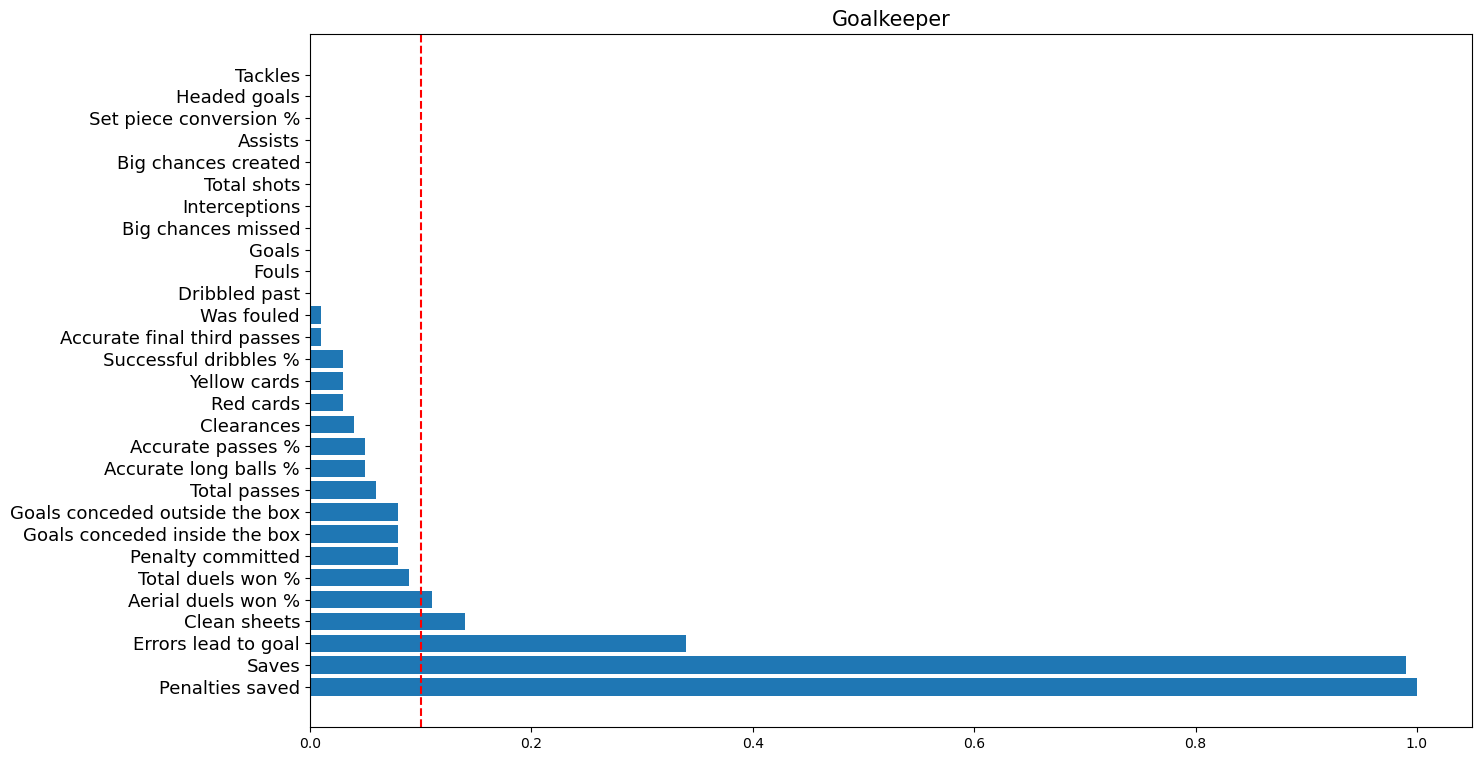

In [55]:
plt.figure(figsize=(15,9))
plt.barh(group_position_T.index,group_position_T.Goalkeeper)
plt.title('Goalkeeper', fontsize=15)
plt.yticks(fontsize=13)
plt.axvline(x=0.10, ls='--', color='r')
plt.show()

In [56]:
#Defensores
group_position_T.sort_values(by='Defense', ascending=False,inplace=True)
group_position_T.head()

,Goalkeeper,Defense,Midfielders,Forwards
Clearances,0.04,0.67,0.22,0.07
Penalty committed,0.08,0.61,0.26,0.05
Interceptions,0.00,0.54,0.40,0.06
Clean sheets,0.14,0.50,0.29,0.07
Errors lead to goal,0.34,0.45,0.20,0.02


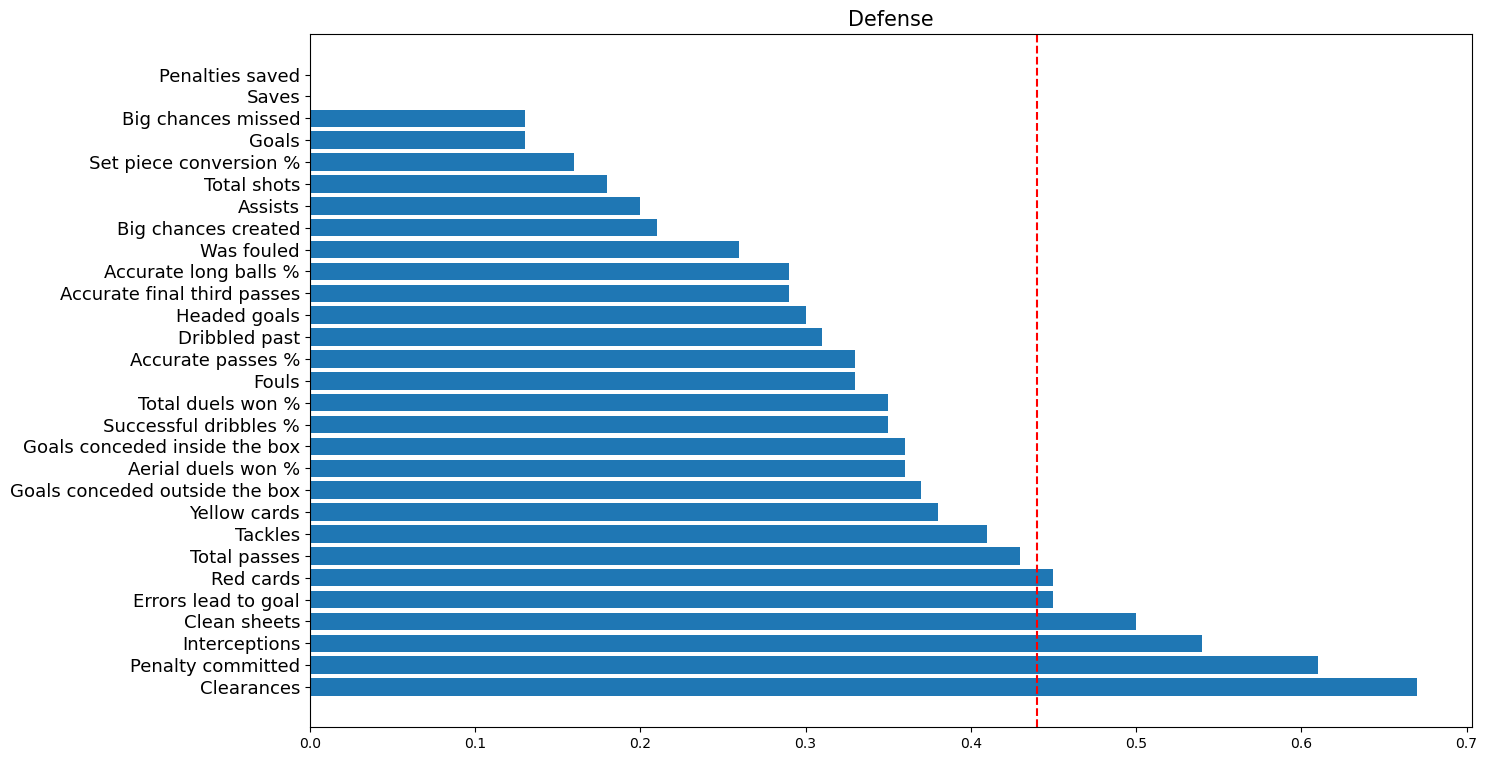

In [57]:
plt.figure(figsize=(15,9))
plt.barh(group_position_T.index,group_position_T.Defense)
plt.title('Defense', fontsize=15)
plt.yticks(fontsize=13)
plt.axvline(x=0.44, ls='--', color='r')
plt.show()

In [58]:
#Medios
group_position_T.sort_values(by='Midfielders', ascending=False,inplace=True)
group_position_T.head()

,Goalkeeper,Defense,Midfielders,Forwards
Set piece conversion %,0.00,0.16,0.63,0.21
Dribbled past,0.00,0.31,0.54,0.15
Assists,0.00,0.20,0.51,0.28
Big chances created,0.00,0.21,0.51,0.28
Accurate final third passes,0.01,0.29,0.51,0.18


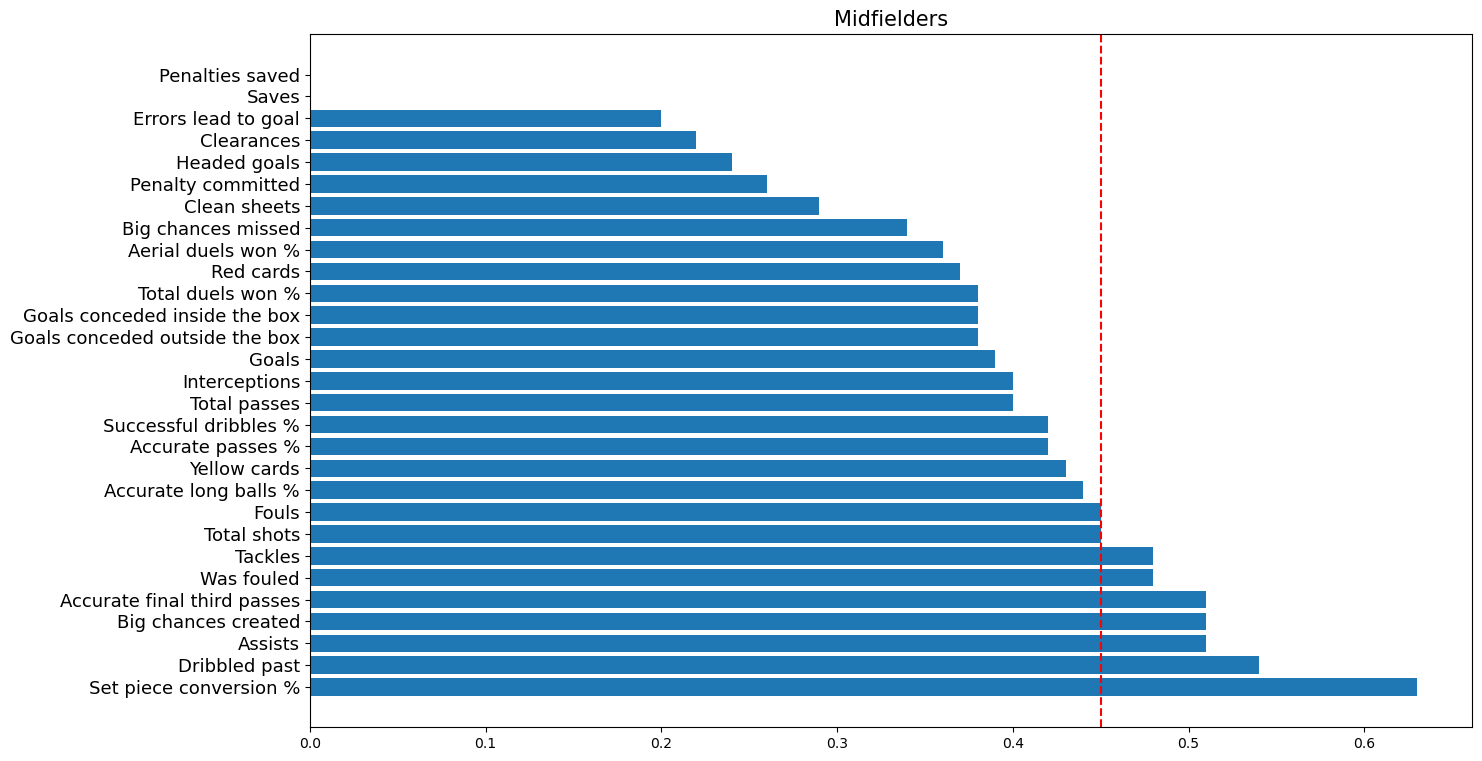

In [59]:
plt.figure(figsize=(15,9))
plt.barh(group_position_T.index,group_position_T.Midfielders)
plt.title('Midfielders', fontsize=15)
plt.yticks(fontsize=13)
plt.axvline(x=0.45, ls='--', color='r')
plt.show()

In [60]:
#Delanteros
group_position_T.sort_values(by='Forwards', ascending=False,inplace=True)
group_position_T

,Goalkeeper,Defense,Midfielders,Forwards
Big chances missed,0.00,0.13,0.34,0.53
Goals,0.00,0.13,0.39,0.48
Headed goals,0.00,0.30,0.24,0.47
Total shots,0.00,0.18,0.45,0.37
Assists,0.00,0.20,0.51,0.28
Big chances created,0.00,0.21,0.51,0.28
Was fouled,0.01,0.26,0.48,0.25
Accurate long balls %,0.05,0.29,0.44,0.23
Fouls,0.00,0.33,0.45,0.22
Set piece conversion %,0.00,0.16,0.63,0.21


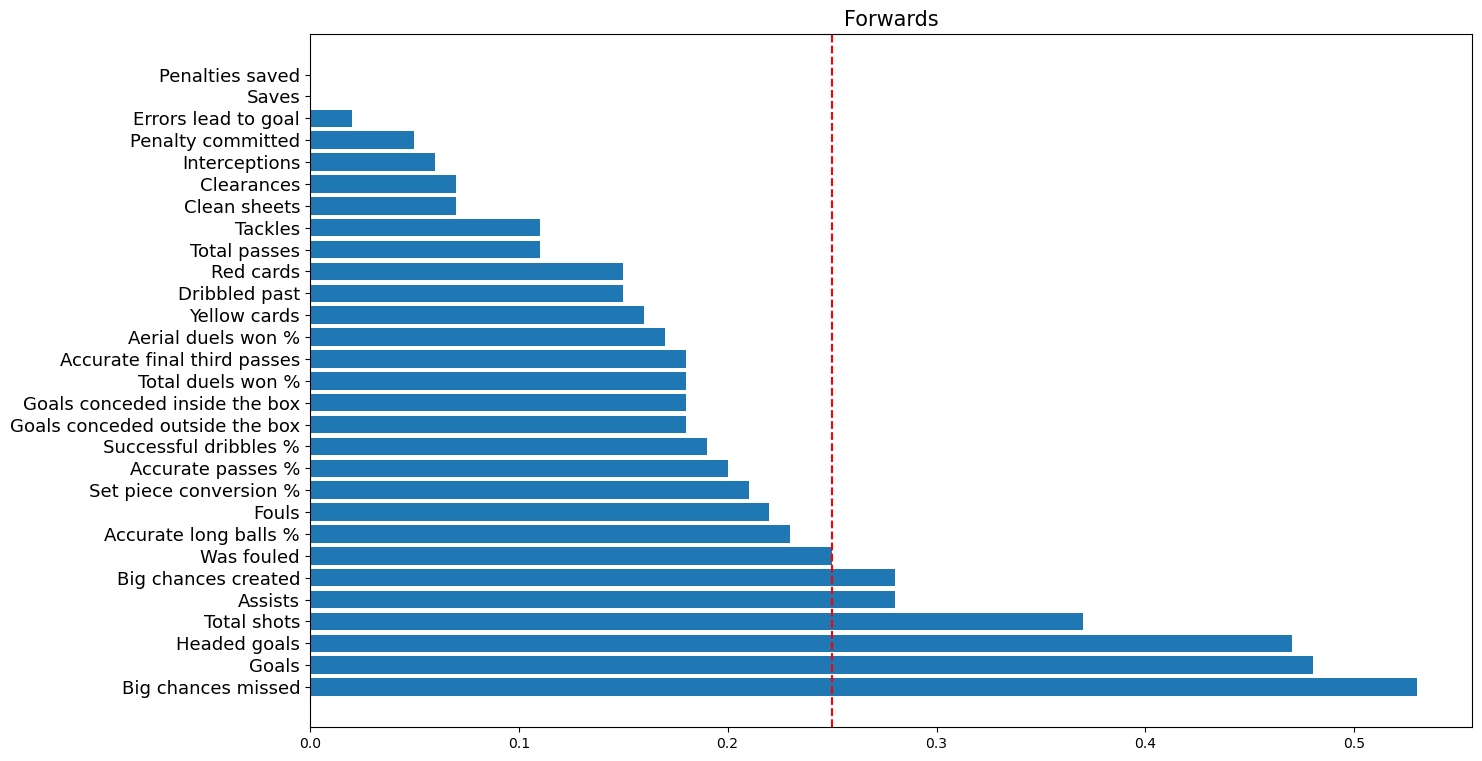

In [61]:
plt.figure(figsize=(15,9))
plt.barh(group_position_T.index,group_position_T.Forwards)
plt.title('Forwards', fontsize=15)
plt.yticks(fontsize=13)
plt.axvline(x=0.25, ls='--', color='r')
plt.show()

# Resultado del Análisis
A través de nuestro análisis, hemos identificado las características más significativas para cada posición en el campo. Estas características son vitales para entender y evaluar el rendimiento de los jugadores en sus respectivas posiciones.

## **Características de Porteros:**

- Penalties saved
- Saves
- Errors lead to goal
- Clean sheets
- Aerial duels won %
- Total duels won %
- Penalty committed
- Goals conceded inside the box
- Goals conceded outside the box

## **Características de Defensas:**

- Clearances
- Penalty committed
- Interceptions
- Clean sheets
- Red cards
- Errors lead to goal
- Total passes
- Tackles

## **Características de Medios:**

- Set piece conversion %
- Dribbled past
- Assists
- Big chances created
- Accurate final third passes
- Was fouled
- Tackles


## **Características de Delanteros:**

- Big chances missed
- Goals
- Headed goals
- Total shots
- Assists
- Big chances created
- Was fouled
- Accurate long balls %
- Fouls
- Set piece conversion %
- Accurate passes %
- Successful dribbles %
- Goals conceded outside the box
- Goals conceded inside the box
- Total duels won %
- Accurate final third passes
- Aerial duels won %

# Conclusión


A lo largo de este proceso, hemos logrado determinar las características clave en las que debemos centrarnos para cada posición. Esto nos permite tener un alcance más amplio y efectivo con respecto a nuestro modelo. Al identificar las características más importantes y eliminar a los jugadores con poca participación, estamos seguros de que contamos con información de gran valor.

Este enfoque minimiza el impacto de la información no esencial y garantiza que nuestro modelo pueda trabajar con datos de alta calidad. De esta manera, podemos trabajar de manera más eficiente y efectiva. Este análisis nos proporciona una base sólida para futuras investigaciones y mejoras en nuestro modelo.